## Project Team ID -- PTID-CDS-DEC-23-1713A

## Project ID -- PRCP-1001-RiceLeaf 

## Project Name --  RiceLeaf disease detection: Image Classification

## Team Member Names --

* Rajeek Akthar
* Huzaf Nadaf
* Vishnu Bala Guru M
* Rajesh Devaguptapu

# Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a model which can classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot.

Task3:- Analyze various techniques like Data Augmentation, etc and create a report on that.


# Domain Analysis

* Rice is one of the most important staple crops worldwide, providing sustenance to over half of the world's population. However, rice plants are vulnerable to several diseases that can severely impact the yield and quality of rice production. Some of the major rice diseases that affect rice plants include bacterial leaf blight, brown spot, and leaf smut.

* Bacterial leaf blight, caused by the bacterium Xanthomonas oryzae pv. oryzae, is a serious disease that can cause extensive damage to rice plants. The symptoms of bacterial leaf blight include water-soaked lesions on the leaves, which later turn brown and dry up. In severe cases, the disease can cause wilting and death of the plant, leading to a significant reduction in crop yield .

* Brown spot, caused by the fungus Cochliobolus miyabeanus, is another major rice disease that can cause significant yield losses. The disease is characterized by small, oval to elliptical spots on the leaves, which turn brown with a yellow halo. In severe cases, the spots can coalesce and cause the leaves to wither and die. Brown spot can also affect the panicles, leading to a reduction in grain quality and yield .

* Leaf smut caused by the fungus Entyloma oryzae, is a relatively less common rice disease. The symptoms of leaf smut include the formation of small, round, and reddish-brown spots on the leaves. These spots later turn black and produce powdery spores. Although leaf smut does not usually cause significant yield losses, it can affect the quality of rice grains by reducing their weight and size .

# Import Libraries

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential

In [90]:
pwd

'C:\\Users\\rajee\\Data_science\\Project\\Data4\\Data'

## Set all the Constants

In [115]:
batch_size = 32
img_height = 300
img_width = 300
channels = 3

# Load and Split dataset

In [92]:
data_dir = 'C:/Users/rajee/Data_science/Project/Data4/Data/Rice_leaf_img/'

In [93]:
data_ds= tf.keras.utils.image_dataset_from_directory(
    directory='C:/Users/rajee/Data_science/Project/Data4/Data/Rice_leaf_img/',
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256,256),
    seed=123,
    shuffle=True,
)

Found 158 files belonging to 3 classes.


In [94]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  directory='C:/Users/rajee/Data_science/Project/Data4/Data/Rice_leaf_img/',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 158 files belonging to 3 classes.
Using 127 files for training.


In [95]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  directory='C:/Users/rajee/Data_science/Project/Data4/Data/Rice_leaf_img/',
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 158 files belonging to 3 classes.
Using 15 files for validation.


In [96]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  directory='C:/Users/rajee/Data_science/Project/Data4/Data/Rice_leaf_img/',
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 158 files belonging to 3 classes.
Using 15 files for validation.


In [97]:
#class labels
class_names = train_ds.class_names
print("Class Names:", class_names)

Class Names: ['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut']


In [98]:
# Counting the number of samples for each class
class_counts = {}
for images, labels in data_ds:
    for label in labels:
        class_name = data_ds.class_names[label]
        if class_name in class_counts:
            class_counts[class_name] += 1
        else:
            class_counts[class_name] = 1

In [116]:
print(class_counts.keys(), class_counts.values())

dict_keys(['Leaf_smut', 'Bacterial_leaf_blight', 'Brown_spot']) dict_values([78, 40, 40])


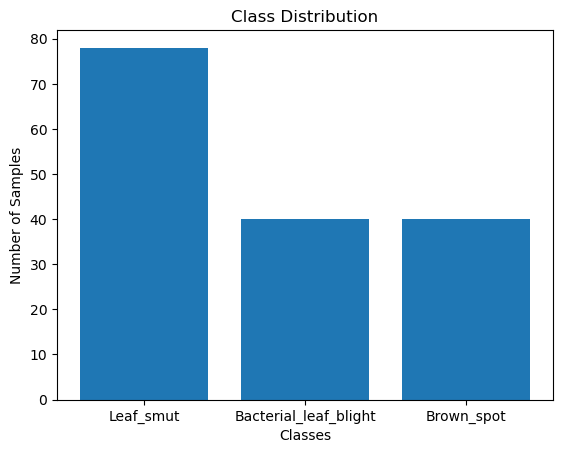

In [99]:
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.show()

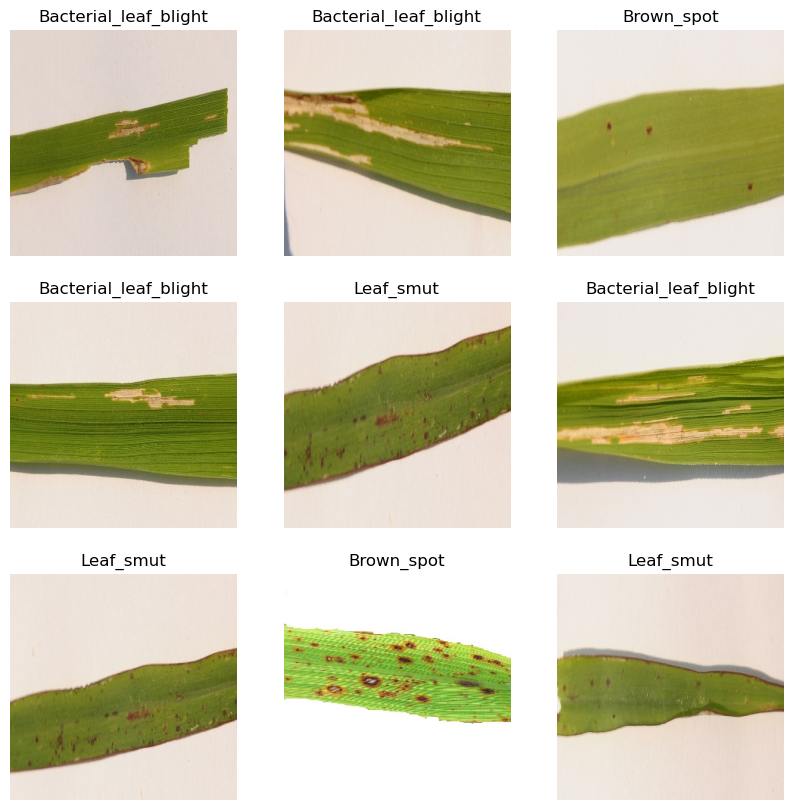

In [100]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [101]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  print(labels_batch.numpy())
  break

(32, 300, 300, 3)
(32,)
[1 0 1 2 0 1 2 2 0 0 2 2 1 2 1 2 2 2 2 0 2 2 2 0 0 1 1 0 2 2 0 1]


### Insights
* We divided our dataset into 3 parts.
* We take 80% dataset for training, 10% dataset for validation and 10% dataset for testing.
* The dataset is having 3 different kinds of rice leaf ,i.e., Bacterial_leaf_blight, Brown_spot, Leaf_smut
* Total Number of images is 158 
* The image pixel size is 256 and batch size is 32

# Resizing and Normalization

In [117]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(img_height, img_width),
  layers.experimental.preprocessing.Rescaling(1./255),
])

### Insights
* Before we feed our images to network, we should be resizing it to the desired size. Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256). This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.

* You might be thinking why do we need to resize (256,256) image to again (256,256). You are right we don't need to but this will be useful when we are done with the training and start using the model for predictions. At that time somone can supply an image that is not (256,256) and this layer will resize it

# Data Augmentation

In [103]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [104]:
# Applying Data Augmentation on train dataset

train_ds_da = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)



### Insights

* In the context of our rice leaf disease image classification project, data augmentation can play a crucial role in improving the performance and robustness of our model. By generating new images with different variations such as rotations, flips, zooms, and other transformations, we can increase the diversity of our dataset and provide our model with more examples to learn from, which can lead to better classification accuracy and robustness to variations in the real-world data.

# Model Architecture

In [110]:
batch_size = 32
img_height = 256
img_width = 256
channels = 3

In [111]:
input_shape = (batch_size, img_height, img_width, channels)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [112]:
# Compile the model
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [113]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 300, 300, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (32, 298, 298, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 149, 149, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 147, 147, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 73, 73, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (32, 71, 71, 256)        

### Insights 
* Here use a CNN coupled with a Softmax Activation in the output layerand also add the initial layers for Resizing, Normalization and Data Augmentation.

In [114]:
epochs = 100
history = model.fit(train_ds_da,validation_data=val_ds, epochs=epochs, batch_size=32)

Epoch 1/100
4/4 [==============================] - 53s 8s/step - loss: 9.1990 - accuracy: 0.3465 - val_loss: 0.9587 - val_accuracy: 0.6000
Epoch 2/100
4/4 [==============================] - 27s 6s/step - loss: 1.1227 - accuracy: 0.4173 - val_loss: 1.2407 - val_accuracy: 0.1333
Epoch 3/100
4/4 [==============================] - 27s 7s/step - loss: 1.1167 - accuracy: 0.3937 - val_loss: 1.0277 - val_accuracy: 0.6000
Epoch 4/100
4/4 [==============================] - 27s 7s/step - loss: 1.0938 - accuracy: 0.4646 - val_loss: 0.9963 - val_accuracy: 0.6000
Epoch 5/100
4/4 [==============================] - 31s 8s/step - loss: 1.0578 - accuracy: 0.4803 - val_loss: 0.9642 - val_accuracy: 0.6000
Epoch 6/100
4/4 [==============================] - 38s 10s/step - loss: 1.0227 - accuracy: 0.5197 - val_loss: 0.8974 - val_accuracy: 0.6000
Epoch 7/100
4/4 [==============================] - 41s 10s/step - loss: 1.0722 - accuracy: 0.4252 - val_loss: 1.0063 - val_accuracy: 0.6000
Epoch 8/100
4/4 [========

4/4 [==============================] - 30s 7s/step - loss: 0.3487 - accuracy: 0.8504 - val_loss: 0.3078 - val_accuracy: 0.8667
Epoch 60/100
4/4 [==============================] - 28s 7s/step - loss: 0.3133 - accuracy: 0.8819 - val_loss: 0.2856 - val_accuracy: 0.8667
Epoch 61/100
4/4 [==============================] - 30s 7s/step - loss: 0.2848 - accuracy: 0.8819 - val_loss: 0.4023 - val_accuracy: 0.8000
Epoch 62/100
4/4 [==============================] - 28s 7s/step - loss: 0.3068 - accuracy: 0.8819 - val_loss: 0.2445 - val_accuracy: 0.8667
Epoch 63/100
4/4 [==============================] - 31s 7s/step - loss: 0.3130 - accuracy: 0.8504 - val_loss: 0.2886 - val_accuracy: 0.8667
Epoch 64/100
4/4 [==============================] - 28s 7s/step - loss: 0.3311 - accuracy: 0.8819 - val_loss: 0.3230 - val_accuracy: 0.8667
Epoch 65/100
4/4 [==============================] - 28s 7s/step - loss: 0.2656 - accuracy: 0.8661 - val_loss: 0.2662 - val_accuracy: 0.9333
Epoch 66/100
4/4 [===============

# Model Evaluation

In [118]:
test_loss, test_accuracy = model.evaluate(val_ds)

print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

1/1 [==============================] - 1s 711ms/step - loss: 1.5792 - accuracy: 0.8667
Test loss: 1.579211950302124
Test accuracy: 0.8666666746139526


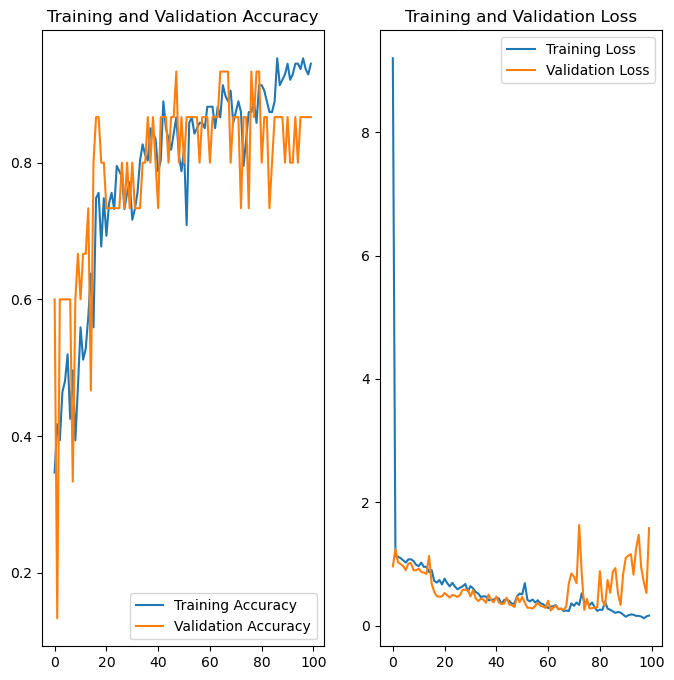

In [119]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Prediction on a sample image

First image to predict


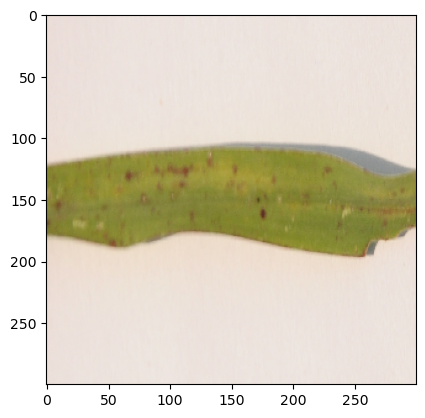

actual label: Leaf_smut
1/1 [==============================] - 1s 969ms/step
predicted label: Leaf_smut


In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a list of class names in the correct order
class_names = ['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut']

for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[2].numpy().astype('uint8')
    first_label = labels_batch[2].numpy()

    print("First image to predict")
    plt.imshow(first_image)
    plt.show()

    print("actual label:", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    predicted_label = np.argmax(batch_prediction[2])
    print("predicted label:", class_names[predicted_label])


# Prediction on few sample images

In [121]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 170ms/step


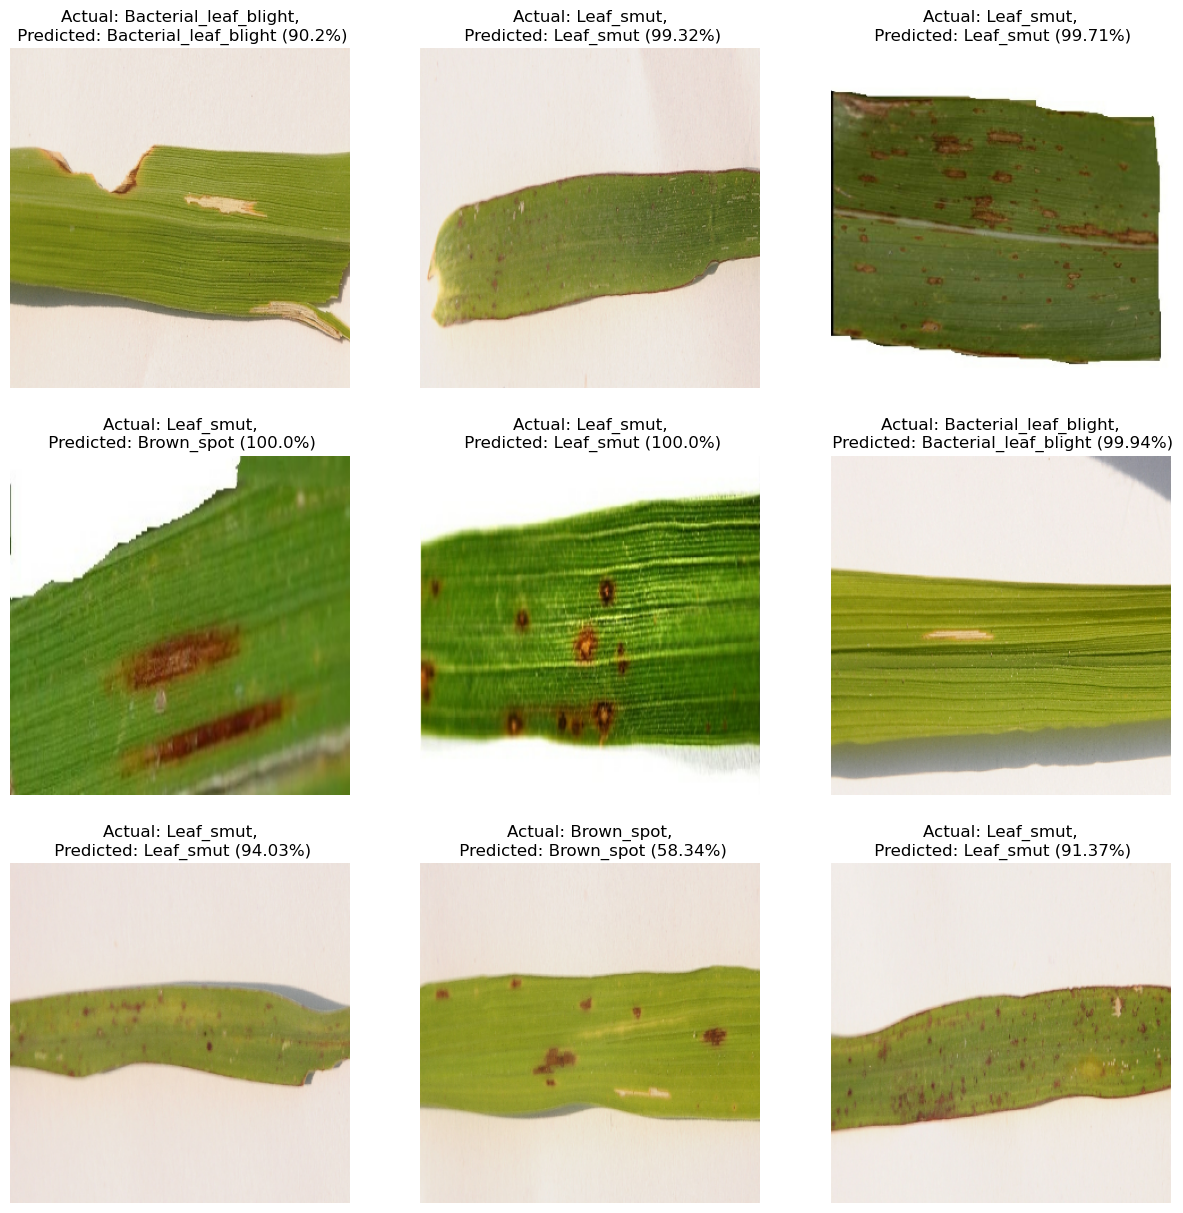

In [122]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class} ({confidence}%)")
        plt.axis("off")
plt.show()

# Summary
* The project involved building a deep learning model to classify images of rice leaf disease. The dataset contained images from 3 type of rice leaf disease namely bacterial bligh, brown spot, and leaf smut. The project was divided into several steps, including data exploration, data preprocessing, building and training deep learning models, and evaluating model performance.

* During data exploration, we analyzed the dataset and visualized the images to get a better understanding of the data. We observed that the dataset was balanced, with an equal number of images for rice leaf diseases. We also noticed that the images were of different sizes and needed to be resized to a uniform size before being used for training. We have rescaled them to uniform size of 256 X 256.

* For data preprocessing, We have normalized the training dataset . We used Keras' ImageDataGenerator to generate augmented images to increase the size of the dataset and reduce overfitting. We also resized the images and divided them into training, validation, and testing sets.

* We built  deep learning models by applying transfer learning technique,  we trained model on augmented datasets and evaluated their performance using accuracy, loss, and time taken per epoch.

# Problem Challenge
### Limited amount of data:
* One of the biggest challenges in the project was the limited amount of data available for training the models. We had only 119 images from 3 classes. This could lead to overfitting, where the model memorizes the training data and does not generalize well to new data. To deal with this challenge, data augmentation techniques were used to artificially increase the size of the dataset. This helped to improve the performance of the models and reduce overfitting.

### Complexity of deep learning models:
* Deep learning models can be very complex and have a large number of parameters, which makes them difficult to train and optimize. To deal with this challenge, various techniques such as regularization, and early stopping were used to prevent overfitting and improve the performance of the models.

### Hardware limitations:
* Deep learning models require a lot of computational resources, especially when training on large datasets. This can be a challenge if we don't have access to powerful hardware. To deal with this challenge, cloud computing services such as Google Colab were used to train the models, which provided access to powerful GPUs without the need for expensive hardware.